# FastAI XLA Extensions Library

> The FastAI XLA Extensions library package allows your fastai/Pytorch models to run on TPUs using the Pytorch-XLA library.

## Documentation Site

You can view the documentation here: https://butchland.github.io/fastai_xla_extensions 

## Install

`pip install fastai_xla_extensions`

## How to use

### Configure TPU Environment Access

The Pytorch XLA package requires an environment supporting TPUs (Kaggle kernels, GCP or Colab environments required). 

Nominally, Pytorch XLA also supports  GPUs so please see the [Pytorch XLA site for more instructions](https://pytorch.org/xla/release/1.7/index.html).

If running on Colab, make sure the Runtime Type is set to TPU.


In [ ]:
#hide
#colab
IN_COLAB = True

In [ ]:
#hide
#colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ImportError:
    IN_COLAB = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#hide
#colab
import os
if IN_COLAB:
    assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [ ]:
#hide
#colab
![ -d /content ] && [ ! -d /content/data ] && curl -s https://course19.fast.ai/setup/colab | bash 

Updating fastai...
Done.


## Install fastai

Use the latest fastai and fastcore versions

In [ ]:
#hide_output
#colab
!pip install -Uqq fastcore --upgrade
!pip install -Uqq fastai --upgrade

## Install Pytorch XLA


This is the official way to install Pytorch-XLA 1.7 as per the [instructions here](https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb#scrollTo=CHzziBW5AoZH)

In [ ]:
#hide_output
#colab
!pip install -Uqq cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 133.6MB 99kB/s 
     |████████████████████████████████| 61kB 3.7MB/s 


In [ ]:
#hide
#colab
# use this for getting pytorch XLA nightly version
# VERSION = "20200707"  #@param ["1.5" , "20200325","20200707", "nightly"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --version $VERSION

In [ ]:
#hide
!pip freeze | grep torch
!pip freeze | grep fast

torch==1.7.0+cu101
torch-xla==1.7
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.8.1+cu101
fastai==2.1.9
fastcore==1.3.12
fastdtw==0.3.4
fastprogress==1.0.0
fastrlock==0.5


In [ ]:
#hide
#colab
%cd /content/drive/MyDrive/fastai_xla_extensions

/content/drive/MyDrive/fastai_xla_extensions


## Check if XLA is available

In [ ]:
#hide
DEBUG = False # set to false for prod release
TRACE = False # set to false for prod release

In [ ]:
#hide
if DEBUG:
    from pdb import set_trace
else:
    from fastcore.imports import noop
    set_trace = noop

In [ ]:
#hide
#colab
import warnings
try:
    import torch_xla
except ImportError as e:
    if DEBUG: warnings.warn('TPU environment not available')
    

In [ ]:
#hide
#colab
%cd /content/drive/MyDrive/fastai_xla_extensions/
import fastai_xla_extensions.core

/content/drive/MyDrive/fastai_xla_extensions


In [ ]:
#hide
#local
%cd ..
import fastai_xla_extensions.core


### Import the libraries
Import the fastai and fastai_xla_extensions libraries

In [ ]:
#colab
#hide_output
import fastai_xla_extensions.core

In [ ]:
from fastai.vision.all import *

### Example
Build a MNIST classifier -- adapted from fastai course [Lesson 4 notebook](https://github.com/fastai/course-v4/blob/master/nbs/04_mnist_basics.ipynb)

In [ ]:
#hide
#local
%cd nbs

In [ ]:
#hide
#colab
%cd /content

/content


Load MNIST dataset 

In [ ]:
path = untar_data(URLs.MNIST_TINY)

In [ ]:
#hide
Path.BASE_PATH = path

Create Fastai DataBlock



In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=Resize(28),
    batch_tfms=aug_transforms(do_flip=False,min_scale=0.8)
)

In [ ]:
#colab
datablock.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/7/7770.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/mnist_tiny/train/7/7770.png
    applying parent_label gives
      7
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(1))


Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'s

Create the dataloader

In [ ]:
dls = datablock.dataloaders(path)

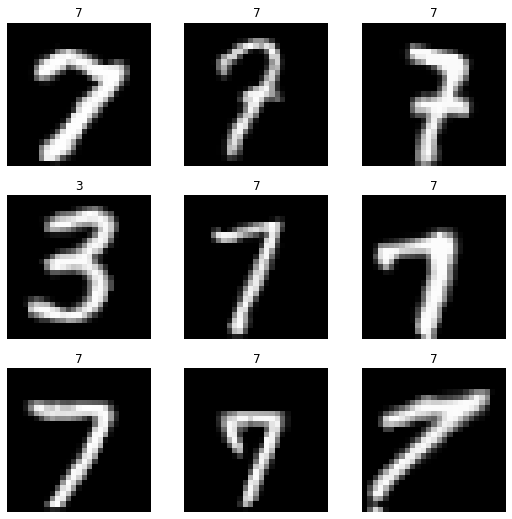

In [ ]:
#colab
dls.show_batch()

Create a Fastai CNN Learner


In [ ]:
learner = cnn_learner(dls, resnet18, metrics=accuracy)
                      

In [ ]:
#colab
learner.summary()

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

### Set Learner to XLA mode
This will setup the learner to use the XLA Device

In [ ]:
#colab
learner.to_xla()

Using the `lr_find` works 

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.0010000000474974513)

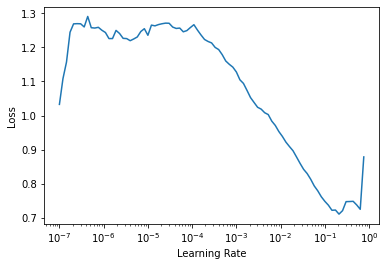

In [ ]:
#colab
learner.lr_find()

Run one cycle training.


In [ ]:
#colab
learner.fit_one_cycle(5,lr_max=slice(1e-4,0.02))

epoch,train_loss,valid_loss,accuracy,time
0,0.749318,0.348496,0.861230,00:12
1,0.634834,0.676399,0.791130,00:03
2,0.621724,0.506193,0.834049,00:03
3,0.553649,0.503763,0.824034,00:03
4,0.500875,0.435466,0.846924,00:03


Further fine-tuning

In [ ]:
#colab
learner.fit_one_cycle(5,slice(7e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.355362,0.312893,0.889843,00:07
1,0.361367,0.271736,0.895565,00:03
2,0.324752,0.205274,0.932761,00:03
3,0.282965,0.197236,0.925608,00:03
4,0.246091,0.187480,0.939914,00:03


In [ ]:
#hide
#colab
learner.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
#hide
#colab
learner.load('stage-1')

Model params are using TPU

In [ ]:
#colab
one_param(learner.model).device

device(type='xla', index=1)

Plot loss seems to be working fine.

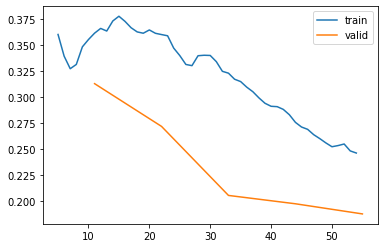

In [ ]:
#colab
learner.recorder.plot_loss()

# Performance troubleshooting

To check if your model is hiting an `aten operation` (an operation that is not handled by accelerator device and returned to CPU for default implementation) you can check it with ands then you can report to pytorch xla team.

In [ ]:
#colab
from fastai_xla_extensions.utils import print_aten_ops

print_aten_ops()

## Samples

Other examples of fastai notebooks using the fastai_xla_extensions package are also available here: 

* [Vision](https://github.com/butchland/fastai_xla_extensions/blob/master/samples/MNIST_TPU_demo.ipynb) [![](https://camo.githubusercontent.com/52feade06f2fecbf006889a904d221e6a730c194/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667)](https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/MNIST_TPU_demo.ipynb)

* [Collaborative Filtering](https://github.com/butchland/fastai_xla_extensions/blob/master/samples/MovieLensCollaborativeFilteringTPU.ipynb) [![](https://camo.githubusercontent.com/52feade06f2fecbf006889a904d221e6a730c194/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667)](https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/MovieLensCollaborativeFilteringTPU.ipynb)

* [Tabular](https://github.com/butchland/fastai_xla_extensions/blob/master/samples/TabularTrainingTPUdemo.ipynb) [![](https://camo.githubusercontent.com/52feade06f2fecbf006889a904d221e6a730c194/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667)](https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/TabularTrainingTPUdemo.ipynb)

More samples will be added in the future as we fix issues and implement more capabilities.


## Status
The fastai XLA extensions library is still in very early development phase (not even alpha) which means there's still a lot of things not working. 

Use it at your own risk.

If you wish to contribute to the project, fork it and make pull request. 

This project uses [nbdev](https://nbdev.fast.ai/) -- a jupyter notebook first development environment and is being developed on [Colab](https://colab.research.google.com).
